作者: 阿凯爱玩机器人 | 微信: xingshunkai  | QQ: 244561792

[B站](https://space.bilibili.com/40344504) | [淘宝店铺](https://shop140985627.taobao.com) | [购买链接](https://item.taobao.com/item.htm?id=677075846402)

## 导入依赖

In [1]:
import numpy as np
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
# 阿凯机器人工具箱
from kyle_robot_toolbox.camera import Gemini335

%matplotlib inline

pybullet build time: Jun  3 2022 02:05:55


## 相机初始化

In [2]:
# 创建相机对象
camera = Gemini335()

astra配置文件夹路径: ../astra-config/config/
初始化视频流:  color
UVC 相机设备号: 0
检测到产品型号为: Astra Pro
初始化UVC视频流


## 创建人脸关键点检测模型

In [3]:
# 人脸Mesh检测模型
mp_face_mesh = mp.solutions.face_mesh
face_mesh =  mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


## 采集图像

注: 前几帧图像质量不好，可以多采集几次

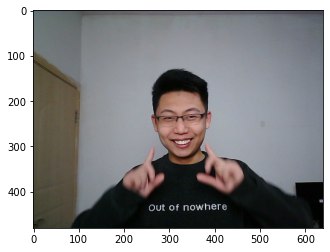

In [62]:
# 注: 前几帧图像质量不好，可以多采集几次  
# 采集图像
img_bgr = camera.read_color_img()
# 图像可视化
plt.imshow(img_bgr[:, :, ::-1])

In [1]:
# cv2.imwrite("img_bgr.png", img_bgr)

## 人脸关键点检测

In [63]:
# 为了提高性能， 将图像标记为只读模式
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb.flags.writeable = False
results = face_mesh.process(img_rgb)

In [64]:
# 获取第一个人脸的Landmark
obj_id = 0
landmark = results.multi_face_landmarks[obj_id].landmark
print(f"Landmark中关键点的个数(归一化): {len(landmark)}")

Landmark中关键点的个数(归一化): 478


In [65]:
# 获取第一个关键点的像素坐标
mark_idx = 0
px = int(landmark[mark_idx].x * camera.img_width)
py = int(landmark[mark_idx].y * camera.img_height)

print(f"关键点:{mark_idx} 像素坐标: px={px} py={py}")

关键点:0 像素坐标: px=327 py=283


## 绘制关键点

In [66]:
# 绘制工具
mp_drawing = mp.solutions.drawing_utils
# 绘制样式
mp_drawing_styles = mp.solutions.drawing_styles
# 关键点绘制样式 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

In [67]:
# 创建画布
canvas = np.copy(img_bgr)

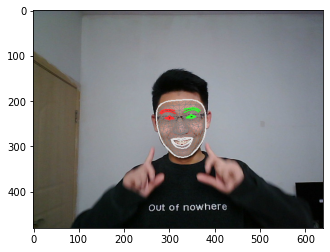

In [68]:
if results.multi_face_landmarks is not None:
      for face_landmarks in results.multi_face_landmarks:
        # 绘制人脸Mesh网格
        mp_drawing.draw_landmarks(
            image=canvas,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        # 绘制人脸边缘
        mp_drawing.draw_landmarks(
            image=canvas,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_contours_style())
        # 绘制虹膜(眼睛+眉毛)
        mp_drawing.draw_landmarks(
            image=canvas,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_iris_connections_style())
        
plt.imshow(canvas[:, :, ::-1])

In [70]:
# cv2.imwrite("canvas.png", canvas)

True